In [3]:
import math
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
import math
from math import exp

plt.style.use("ggplot")

def cheb(n,x):
    cz = np.polynomial.chebyshev.Chebyshev((int(0==n),int(1==n),int(2==n),int(3==n),int(4==n),int(5==n),int(6==n),int(7==n),int(8==n),int(9==n),int(10==n)))
    return cz(x)

# define the probability function
def p(x, alpha, rho1, rho2):
    p = (np.exp(-alpha*x))/(rho1+rho2*np.exp(-alpha*x))
    return p

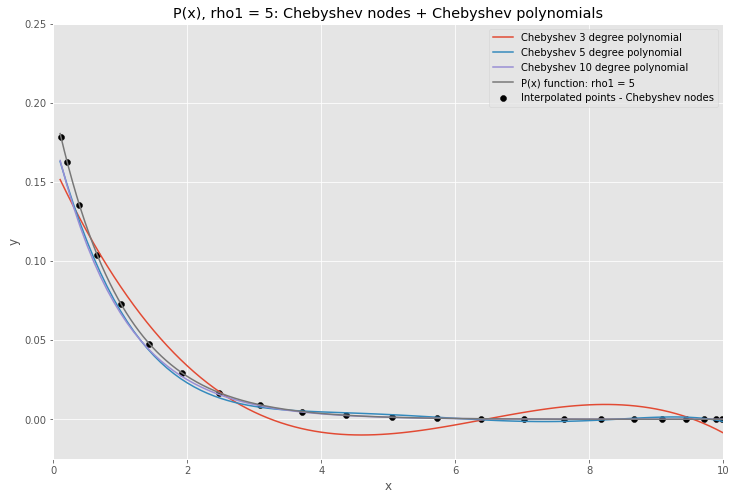

In [5]:
# Plot the rung function
x = np.linspace(0.1,10,800)
y_p1 = p(x, 1, 5, 0.01)


#Chebyshev Regression
for n in [3,5,10]:
    #calculate theta's
    m = 23 # num of chebyshev nodes

    #Step 1 Compute the m ≥ n + 1 Chebyshev interpolation nodes in [−1, 1]:
    z1 = np.zeros(m)
    k=1
    while k <= m:
        z1[k-1] = math.cos((2*k-1)/(2*m)*math.pi)
        k += 1

    #Step 2 Adjust the nodes to the [a, b] interval:
    x1 = np.zeros(m)
    k=1
    while k <= m:
        #x1[k-1] = 10.1/2+9.9/2*z1[k-1]
        x1[k-1] = (z1[k-1] + 1)*(9.9/2)+0.1
        k += 1

    #Step 3 Evaluate f at the approximation nodes: wk = f (xk ), k = 1, ..., m.
    y1 = p(x1, 1, 5, 0.01)
 
    #Step 4 Compute Chebyshev coefficients, theta(i), associated with Chebyshev basis i = 0, ..., n:
    theta = np.zeros(n+1)

    for i in range(n+1):
        sumNom = 0
        sumDen = 0
        for k in range(m):
            sumNom = sumNom + y1[k]*cheb(i,z1[k])
            sumDen = sumDen + cheb(i,z1[k])*cheb(i,z1[k])
        theta[i] = sumNom/sumDen
    
    #to arrive at the approximation for f (x), x ∈ [a, b]:
    X = np.linspace(0.1,10,100)
    Y = np.zeros(100)

    for c in range(100):
        f=0
        for i in range(n+1):
             f = f + theta[i]*cheb(i, (2*(X[c])/10 - 1))
        Y[c] = f

    plt.plot(X,Y,label='Chebyshev ' + str(n) + ' degree polynomial')

plt.plot(x,y_p1,label='P(x) function: rho1 = 5')
plt.scatter(x1,y1, c= 'black', label='Interpolated points - Chebyshev nodes')
plt.xlim([0,10])
plt.ylim([-0.025,0.25])
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('P(x), rho1 = 5: Chebyshev nodes + Chebyshev polynomials')
plt.rcParams["figure.figsize"] = (12,8)

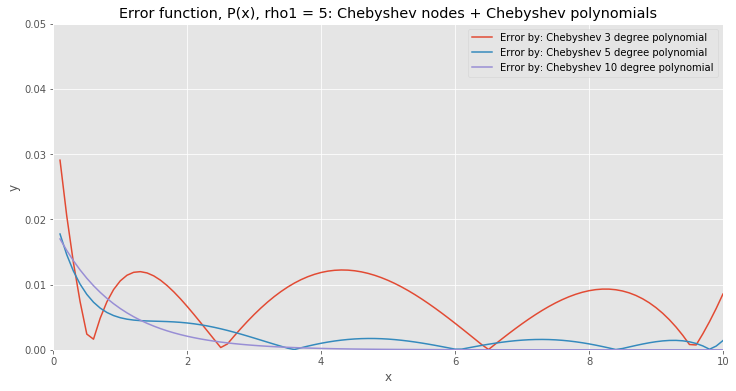

In [7]:
# Plot the rung function
x = np.linspace(0.1,10,100)
y_p1 = p(x, 1, 5, 0.01)
#plt.plot(x,y_p1,label='P(x) function: rho1 = 5')

#Chebyshev Regression
for n in [3,5,10]:
    #calculate theta's
    m = 23 # num of chebyshev nodes

    #Step 1 Compute the m ≥ n + 1 Chebyshev interpolation nodes in [−1, 1]:
    z1 = np.zeros(m)
    k=1
    while k <= m:
        z1[k-1] = math.cos((2*k-1)/(2*m)*math.pi)
        k += 1

    #Step 2 Adjust the nodes to the [a, b] interval:
    x1 = np.zeros(m)
    k=1
    while k <= m:
        #x1[k-1] = 10.1/2+9.9/2*z1[k-1]
        x1[k-1] = (z1[k-1] + 1)*(9.9/2)+0.1
        k += 1

    #Step 3 Evaluate f at the approximation nodes: wk = f (xk ), k = 1, ..., m.
    y1 = p(x1, 1, 5, 0.01)
 
    #Step 4 Compute Chebyshev coefficients, theta(i), associated with Chebyshev basis i = 0, ..., n:
    theta = np.zeros(n+1)

    for i in range(n+1):
        sumNom = 0
        sumDen = 0
        for k in range(m):
            sumNom = sumNom + y1[k]*cheb(i,z1[k])
            sumDen = sumDen + cheb(i,z1[k])*cheb(i,z1[k])
        theta[i] = sumNom/sumDen
    
    #to arrive at the approximation for f (x), x ∈ [a, b]:
    X = np.linspace(0.1,10,100)
    Y = np.zeros(100)

    for c in range(100):
        f=0
        for i in range(n+1):
             f = f + theta[i]*cheb(i, (2*(X[c])/10 - 1))
        Y[c] = f

    plt.plot(X,abs(Y-y_p1),label='Error by: Chebyshev ' + str(n) + ' degree polynomial')


#plt.scatter(x1,y1, c= 'black', label='Interpolated points - Chebyshev nodes')
plt.xlim([0,10])
plt.ylim([0,0.05])
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('Error function, P(x), rho1 = 5: Chebyshev nodes + Chebyshev polynomials')
plt.rcParams["figure.figsize"] = (12,6)

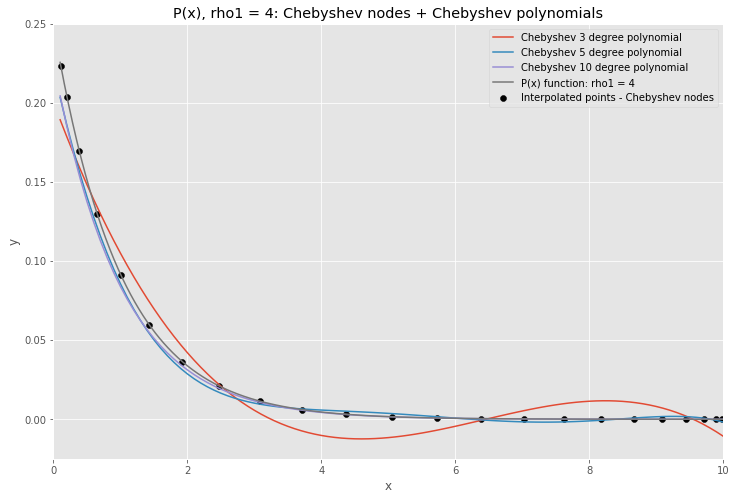

In [19]:
### Plot the p(x) function
x = np.linspace(0.1,10,800)
y_p1 = p(x, 1, 4, 0.01)


#Chebyshev Regression
for n in [3,5,10]:
    #calculate theta's
    m = 23 # num of chebyshev nodes

    #Step 1 Compute the m ≥ n + 1 Chebyshev interpolation nodes in [−1, 1]:
    z1 = np.zeros(m)
    k=1
    while k <= m:
        z1[k-1] = math.cos((2*k-1)/(2*m)*math.pi)
        k += 1

    #Step 2 Adjust the nodes to the [a, b] interval:
    x1 = np.zeros(m)
    k=1
    while k <= m:
        #x1[k-1] = 10.1/2+9.9/2*z1[k-1]
        x1[k-1] = (z1[k-1] + 1)*(9.9/2)+0.1
        k += 1

    #Step 3 Evaluate f at the approximation nodes: wk = f (xk ), k = 1, ..., m.
    y1 = p(x1, 1, 4, 0.01)
 
    #Step 4 Compute Chebyshev coefficients, theta(i), associated with Chebyshev basis i = 0, ..., n:
    theta = np.zeros(n+1)

    for i in range(n+1):
        sumNom = 0
        sumDen = 0
        for k in range(m):
            sumNom = sumNom + y1[k]*cheb(i,z1[k])
            sumDen = sumDen + cheb(i,z1[k])*cheb(i,z1[k])
        theta[i] = sumNom/sumDen
    
    #to arrive at the approximation for f (x), x ∈ [a, b]:
    X = np.linspace(0.1,10,100)
    Y = np.zeros(100)

    for c in range(100):
        f=0
        for i in range(n+1):
             f = f + theta[i]*cheb(i, (2*(X[c])/10 - 1))
        Y[c] = f

    plt.plot(X,Y,label='Chebyshev ' + str(n) + ' degree polynomial')

plt.plot(x,y_p1,label='P(x) function: rho1 = 4')
plt.scatter(x1,y1, c= 'black', label='Interpolated points - Chebyshev nodes')
plt.xlim([0,10])
plt.ylim([-0.025,0.25])
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('P(x), rho1 = 4: Chebyshev nodes + Chebyshev polynomials')
plt.rcParams["figure.figsize"] = (12,8)

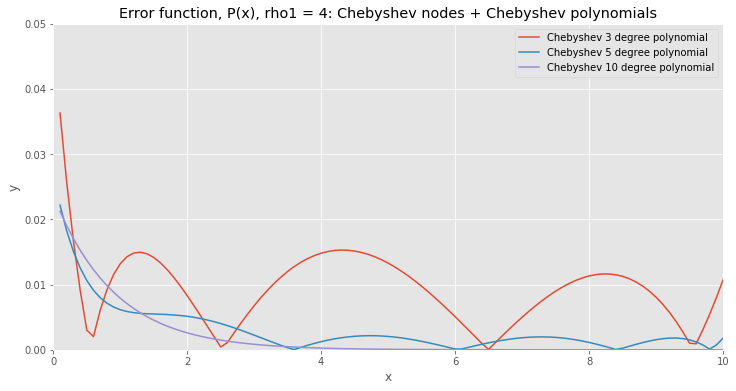

In [25]:
### Plot the p(x) function
x = np.linspace(0.1,10,100)
y_p1 = p(x, 1, 4, 0.01)
#plt.plot(x,y_p1,label='P(x) function: rho1 = 4')

#Chebyshev Regression
for n in [3,5,10]:
    #calculate theta's
    m = 23 # num of chebyshev nodes

    #Step 1 Compute the m ≥ n + 1 Chebyshev interpolation nodes in [−1, 1]:
    z1 = np.zeros(m)
    k=1
    while k <= m:
        z1[k-1] = math.cos((2*k-1)/(2*m)*math.pi)
        k += 1

    #Step 2 Adjust the nodes to the [a, b] interval:
    x1 = np.zeros(m)
    k=1
    while k <= m:
        #x1[k-1] = 10.1/2+9.9/2*z1[k-1]
        x1[k-1] = (z1[k-1] + 1)*(9.9/2)+0.1
        k += 1

    #Step 3 Evaluate f at the approximation nodes: wk = f (xk ), k = 1, ..., m.
    y1 = p(x1, 1, 4, 0.01)
 
    #Step 4 Compute Chebyshev coefficients, theta(i), associated with Chebyshev basis i = 0, ..., n:
    theta = np.zeros(n+1)

    for i in range(n+1):
        sumNom = 0
        sumDen = 0
        for k in range(m):
            sumNom = sumNom + y1[k]*cheb(i,z1[k])
            sumDen = sumDen + cheb(i,z1[k])*cheb(i,z1[k])
        theta[i] = sumNom/sumDen
    
    #to arrive at the approximation for f (x), x ∈ [a, b]:
    X = np.linspace(0.1,10,100)
    Y = np.zeros(100)

    for c in range(100):
        f=0
        for i in range(n+1):
             f = f + theta[i]*cheb(i, (2*(X[c])/10 - 1))
        Y[c] = f

    plt.plot(X,abs(y_p1-Y),label='Chebyshev ' + str(n) + ' degree polynomial')


#plt.scatter(x1,y1, c= 'black', label='Interpolated points - Chebyshev nodes')
plt.xlim([0,10])
plt.ylim([0,0.05])
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('Error function, P(x), rho1 = 4: Chebyshev nodes + Chebyshev polynomials')
plt.rcParams["figure.figsize"] = (12,6)